# EDA of Data science job postings on glassdoor


## Goal of the project¶
The main objective of this project is to analyze job postings for data science roles on Glassdoor. The aim is to identify the most in-demand skills, the geographical locations with the most job opportunities, the average salaries, the types of companies offering these jobs, the size of these companies, the sectors and industries they belong to, and how these variables influence the average salary offered

## What will be the steps to follow?¶
First, the data will be cleaned. This includes removing unnecessary characters, transforming data types, splitting data into different columns, and analyzing the Job Description column to extract the required skills and place them in other columns for easier processing.

Next, the data will be analyzed using graphs, starting with a univariate analysis and then moving on to a multivariate analysis.

Conclusions will be drawn from these analyses.

## Data Acquisition
The dataset is publicly accessible and was sourced from Kaggle -> https://www.kaggle.com/datasets/rashikrahmanpritom/data-science-job-posting-on-glassdoor/data

## Data Cleaning

In [190]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # to create 2D plots
import seaborn as sns # to make attractive statisitical graphics

Install the kaggle python library

In [191]:
!pip install kaggle

Mount the Google drive so that we can stroe our Kaggle API credentials for future use

In [192]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Make a directory for kaggle at the temporary instance location on Colab drive.

Download kaggle API key (.json file). We can do this by going to your kaggle account page and clicking 'Create new API token' under the API section.

Change the file permissions to read/write to the owner only

In [193]:

! chmod 600 /content/drive/MyDrive/Kaggle/kaggle.json

Downloading dataset

In [194]:
!kaggle datasets download rashikrahmanpritom/data-science-job-posting-on-glassdoor

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/data-science-job-posting-on-glassdoor
License(s): CC0-1.0
data-science-job-posting-on-glassdoor.zip: Skipping, found more recently modified local copy (use --force to force download)


the files downloaded would be a Zip file. Hence you need to unzip it using following

In [195]:
import zipfile

zip_ref = zipfile.ZipFile('data-science-job-posting-on-glassdoor.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [196]:
path = "Uncleaned_DS_jobs.csv"
df = pd.read_csv(path)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [197]:
# verification for duplication in dataset
if df.duplicated().any():
  print("The DataFrame has duplication")

  duplication = df[df.duplicated(keep=False)]
  print("Duplicated:")
  print(duplication)

else:
  print("No duplication present in DataFrame")

No duplication present in DataFrame


The code df.info() provides a concise summary of the DataFrame, including the index, columns, data types of each column, and memory usage.

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


The code df.describe() generates a statistical summary of the numerical columns in the DataFrame.

In [199]:
df.describe()

,index,Rating,Founded
count,672.000000,672.000000,672.000000
mean,335.500000,3.518601,1635.529762
std,194.133974,1.410329,756.746640
min,0.000000,-1.000000,-1.000000
25%,167.750000,3.300000,1917.750000
50%,335.500000,3.800000,1995.000000
75%,503.250000,4.300000,2009.000000
max,671.000000,5.000000,2019.000000


The code print(df.dtypes) displays the data types of each column in the DataFrame

In [200]:
print(df.dtypes)

index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object


This code renames the columns of the DataFrame df. It converts all column names to lowercase and replaces spaces with underscores.**bold text**

In [201]:
df.rename(columns= lambda header: header.lower().replace(" ","_"), inplace= True)

The column named "index" is removed from the DataFrame df using the drop() method. The argument columns="index" specifies that a column with that name should be deleted. The assignment df = updates the DataFrame df without the removed column.



In [202]:
df = df.drop(columns="index")


In [203]:
df

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


Searching for any infinity value

In [204]:
df.isin([np.inf, -np.inf]).any()

,0
job_title,False
salary_estimate,False
job_description,False
rating,False
company_name,False
location,False
headquarters,False
size,False
founded,False
type_of_ownership,False


In [205]:
# Dropping unnecessary dolumn(s)
df.drop(['competitors'], axis=1, inplace = True)
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD)
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD)
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD)
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


star cleaning with the job title column

In [206]:
df['job_title'].value_counts()

,count
job_title,
Data Scientist,337
Data Engineer,26
Senior Data Scientist,19
Machine Learning Engineer,16
Data Analyst,12
...,...
Data Science Instructor,1
Business Data Analyst,1
Purification Scientist,1


In [207]:
df['job_title'].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

In [208]:
# Categorizing Job Titles and reducing those categories
def job_title_cleaning(title):
  if 'data scientist' in title.lower():
    return 'Data Scientist'
  elif ' data engineer' in title.lower():
    return 'Data Engineer'
  elif 'analyst' in title.lower():
    return 'Analyst'
  elif 'manager' in title.lower():
    return 'Manager'
  elif 'director' in title.lower():
    return 'Director'
  else:
    return 'Other'

In [209]:
df['Job Title Cleaned'] = df['job_title'].apply(job_title_cleaning)
df['Job Title Cleaned'].value_counts()

,count
Job Title Cleaned,
Data Scientist,455
Other,138
Analyst,55
Data Engineer,14
Manager,7
Director,3


Cleaning Job Titles by their levels

In [210]:

def level_cleaning(title):
  if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
    return 'Senior'
  elif 'jr' in title.lower() or 'jr.' in title.lower():
    return 'Junior'
  else:
    return ' Other'

In [211]:
df['Job Level'] = df['job_title'].apply(level_cleaning)
df['Job Level'].value_counts()

,count
Job Level,
Other,576
Senior,94
Junior,2


In [212]:
df.drop(['job_title'], axis = 1, inplace = True)
df.head()

,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,Job Title Cleaned,Job Level
0,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Senior
1,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,Other
2,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,Other
3,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,Other
4,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,Other


In [213]:
# Analyzing Salary column
df['salary_estimate'].value_counts()

,count
salary_estimate,
$79K-$131K (Glassdoor est.),32
$99K-$132K (Glassdoor est.),32
$75K-$131K (Glassdoor est.),32
$137K-$171K (Glassdoor est.),30
$90K-$109K (Glassdoor est.),30
$56K-$97K (Glassdoor est.),22
$79K-$106K (Glassdoor est.),22
$90K-$124K (Glassdoor est.),22
$110K-$163K (Glassdoor est.),21


In [214]:
df['salary_estimate'].unique()

array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

In [215]:
df['salary_estimate'] = df['salary_estimate'].apply(lambda x: x.split('(')[0])
df['salary_estimate'].unique()

array(['$137K-$171K ', '$75K-$131K ', '$79K-$131K ', '$99K-$132K ',
       '$90K-$109K ', '$101K-$165K ', '$56K-$97K ', '$79K-$106K ',
       '$71K-$123K ', '$90K-$124K ', '$91K-$150K ', '$141K-$225K ',
       '$145K-$225K', '$79K-$147K ', '$122K-$146K ', '$112K-$116K ',
       '$110K-$163K ', '$124K-$198K ', '$79K-$133K ', '$69K-$116K ',
       '$31K-$56K ', '$95K-$119K ', '$212K-$331K ', '$66K-$112K ',
       '$128K-$201K ', '$138K-$158K ', '$80K-$132K ', '$87K-$141K ',
       '$92K-$155K ', '$105K-$167K '], dtype=object)

In [216]:
df['salary_estimate'] = df['salary_estimate'].apply(lambda x: x.replace('K','').replace('$',''))
df['salary_estimate'].unique()

array(['137-171 ', '75-131 ', '79-131 ', '99-132 ', '90-109 ', '101-165 ',
       '56-97 ', '79-106 ', '71-123 ', '90-124 ', '91-150 ', '141-225 ',
       '145-225', '79-147 ', '122-146 ', '112-116 ', '110-163 ',
       '124-198 ', '79-133 ', '69-116 ', '31-56 ', '95-119 ', '212-331 ',
       '66-112 ', '128-201 ', '138-158 ', '80-132 ', '87-141 ', '92-155 ',
       '105-167 '], dtype=object)

In [217]:
df['Min Salary'] = df['salary_estimate'].apply(lambda x: int(x.split('-')[0]))
df['Max Salary'] = df['salary_estimate'].apply(lambda x: int(x.split('-')[1]))
df.drop(['salary_estimate'], axis = 1, inplace = True)
df['Average Salart'] = (df['Min Salary'] + df['Max Salary'])/2
df.head()

,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,Job Title Cleaned,Job Level,Min Salary,Max Salary,Average Salart
0,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Senior,137,171,154.0
1,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,Other,137,171,154.0
2,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,Other,137,171,154.0
3,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,Other,137,171,154.0
4,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,Other,137,171,154.0


In [218]:
df['company_name'] = df['company_name'].apply(lambda x: x.split('\n')[0])
df['company_name']


,company_name
0,Healthfirst
1,ManTech
2,Analysis Group
3,INFICON
4,Affinity Solutions
...,...
667,TRANZACT
668,JKGT
669,AccessHope
670,ChaTeck Incorporated


In [219]:
df['founded'].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962])

In [220]:
df['founded'] = df['founded'].apply(lambda x: 2024 if x == -1 else int(x))
df['founded'].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995, 2024,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962])

In [221]:
df['years_of_operation'] = 2024 - df['founded']
df.drop(['founded'], axis = 1, inplace = True)
df['years_of_operation'].unique()

array([ 31,  56,  43,  24,  26,  14,  28,  34,  41,  10,  12,   8,  59,
        51,  38,  27,   9,  79,  36,   7,  13,  57, 164,  32,  21,  73,
        19,   5,  99,  16,  25,  46,  58, 112,  66,  11, 175, 243,  98,
        18,  30, 161,  29,   0,  42,  50,  23,  39, 111,  53, 113,  15,
        65,  17,  85,  22,  63,  61,  55,  78,  67,  71,  76, 174, 173,
        20,  48, 106,  70,  77,  69,   6,  87, 107,  89,  95, 204,  72,
        92, 130,  64, 236, 194,  40,  91, 144, 137,  54,  82,  44,  35,
       116, 171, 149, 110, 126,  68,  47,  37, 128,  52,  75,  62])

In [222]:
df['rating'].unique()

array([ 3.1,  4.2,  3.8,  3.5,  2.9,  3.9,  4.4,  3.6,  4.5,  4.7,  3.7,
        3.4,  4.1,  3.2,  4.3,  2.8,  5. ,  4.8,  3.3,  2.7,  2.2,  2.6,
        4. ,  2.5,  4.9,  2.4, -1. ,  2.3,  4.6,  3. ,  2.1,  2. ])

In [223]:
df['rating'] = df['rating'].apply(lambda x: 0 if x < 0 else x)
df['rating'].unique()

array([3.1, 4.2, 3.8, 3.5, 2.9, 3.9, 4.4, 3.6, 4.5, 4.7, 3.7, 3.4, 4.1,
       3.2, 4.3, 2.8, 5. , 4.8, 3.3, 2.7, 2.2, 2.6, 4. , 2.5, 4.9, 2.4,
       0. , 2.3, 4.6, 3. , 2.1, 2. ])

In [224]:
df.head()

,job_description,rating,company_name,location,headquarters,size,type_of_ownership,industry,sector,revenue,Job Title Cleaned,Job Level,Min Salary,Max Salary,Average Salart,years_of_operation
0,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Senior,137,171,154.0,31
1,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,Other,137,171,154.0,56
2,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,Other,137,171,154.0,43
3,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,Other,137,171,154.0,24
4,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,Other,137,171,154.0,26


In [225]:
df['location'].unique()

array(['New York, NY', 'Chantilly, VA', 'Boston, MA', 'Newton, MA',
       'Santa Barbara, CA', 'Cambridge, MA', 'Bedford, MA',
       'San Diego, CA', 'Chicago, IL', 'Herndon, VA', 'Saint Louis, MO',
       'Richland, WA', 'Northbrook, IL', 'Washington, DC', 'Remote',
       'Memphis, TN', 'Plano, TX', 'West Grove, PA', 'Phoenix, AZ',
       'Appleton, WI', 'Atlanta, GA', 'Orlando, FL', 'Lexington, MA',
       'McLean, VA', 'San Francisco, CA', 'Sheboygan, WI',
       'United States', 'Bothell, WA', 'Lincoln, NE', 'Overland Park, KS',
       'Santa Monica, CA', 'Portsmouth, NH', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Bellevue, WA',
       'New Orleans, LA', 'Akron, OH', 'Fort Wayne, IN', 'Woburn, MA',
       'Carson, CA', 'Coral Gables, FL', 'Santa Clara, CA',
       'Brisbane, CA', 'Winter Park, FL', 'Redwood City, CA',
       'Peoria, IL', 'Ipswich, MA', 'Carmel, IN', 'Emeryville, CA',
       'Gaithersburg, MD', 'Longmont, CO', 'Austin, TX', 'Yakima, WA',
 

In [226]:
df['state'] = df['location'].apply(lambda x: x.split(',')[0])
df.drop(['location'], axis =1 , inplace = True)
df.head()

,job_description,rating,company_name,headquarters,size,type_of_ownership,industry,sector,revenue,Job Title Cleaned,Job Level,Min Salary,Max Salary,Average Salart,years_of_operation,state
0,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Senior,137,171,154.0,31,New York
1,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,Other,137,171,154.0,56,Chantilly
2,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,Other,137,171,154.0,43,Boston
3,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,Other,137,171,154.0,24,Newton
4,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,Other,137,171,154.0,26,New York


In [227]:
df['headquarters'] = df['headquarters'].apply(lambda x: x.split(',')[0])
df['same_state_head_quarters'] = df.apply(lambda x: 1 if x.state == x.headquarters else 0, axis = 1)
df['same_state_head_quarters'].value_counts()

,count
same_state_head_quarters,
0,402
1,270


In [228]:
df.head()

,job_description,rating,company_name,headquarters,size,type_of_ownership,industry,sector,revenue,Job Title Cleaned,Job Level,Min Salary,Max Salary,Average Salart,years_of_operation,state,same_state_head_quarters
0,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,New York,1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Senior,137,171,154.0,31,New York,1
1,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,Herndon,5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,Other,137,171,154.0,56,Chantilly,0
2,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,Boston,1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,Other,137,171,154.0,43,Boston,1
3,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,Bad Ragaz,501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,Other,137,171,154.0,24,Newton,0
4,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,New York,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,Other,137,171,154.0,26,New York,1


In [229]:
df['job_description'][0].split('\n')

['Description',
 '',
 'The Senior Data Scientist is responsible for defining, building, and improving statistical models to improve business processes and outcomes in one or more healthcare domains such as Clinical, Enrollment, Claims, and Finance. As part of the broader analytics team, Data Scientist will gather and analyze data to solve and address complex business problems and evaluate scenarios to make predictions on future outcomes and work with the business to communicate and support decision-making. This position requires strong analytical skills and experience in analytic methods including multivariate regressions, hierarchical linear models, regression trees, clustering methods and other complex statistical techniques.',
 '',
 'Duties & Responsibilities:',
 '',
 '• Develops advanced statistical models to predict, quantify or forecast various operational and performance metrics in multiple healthcare domains',
 '• Investigates, recommends, and initiates acquisition of new data 

In [230]:
def python(skill):
  if 'python' in skill.lower():
    return 1
  else:
    return 0
df['Python']  = df['job_description'].apply(python)

def excel(skill):
  if 'Excel' in skill.lower():
    return 1
  else:
    return 0
df['Excel']  = df['job_description'].apply(excel)

def sql(skill):
  if 'sql' in skill.lower():
    return 1
  else:
    return 0
df['SQL']  = df['job_description'].apply(sql)


def visualization(skill):
  if 'tableau' or 'power bi' in skill.lower():
    return 1
  else:
    return 0
df['Visualization']  = df['job_description'].apply(visualization)

def aws(skill):
  if 'aws' in skill.lower():
    return 1
  else:
    return 0
df['AWS']  = df['job_description'].apply(aws)


def spark(skill):
  if 'spark' in skill.lower():
    return 1
  else:
    return 0
df['Spark']  = df['job_description'].apply(spark)


def hadoop(skill):
  if 'hadoop' in skill.lower():
    return 1
  else:
    return 0
df['Hadoop']  = df['job_description'].apply(hadoop)


def big_data(skill):
  if 'big data' in skill.lower():
    return 1
  else:
    return 0
df['Big_Data']  = df['job_description'].apply(big_data)

def machine_learning(skill):
  if 'machine_learning' in skill.lower():
    return 1
  else:
    return 0
df['machine_learning']  = df['job_description'].apply(machine_learning)

In [231]:
df.head()

,job_description,rating,company_name,headquarters,size,type_of_ownership,industry,sector,revenue,Job Title Cleaned,...,same_state_head_quarters,Python,Excel,SQL,Visualization,AWS,Spark,Hadoop,Big_Data,machine_learning
0,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,New York,1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,...,1,0,0,0,1,1,0,0,0,0
1,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,Herndon,5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,...,0,0,0,1,1,0,0,1,1,0
2,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,Boston,1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,...,1,1,0,0,1,1,0,0,0,0
3,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,Bad Ragaz,501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,...,0,1,0,1,1,1,0,0,0,0
4,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,New York,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,...,1,1,0,1,1,0,0,0,0,0


In [232]:
# Skills Count
skills_count = pd.DataFrame({
    'Python': df['Python'].value_counts(),
    'Excel': df['Excel'].value_counts(),
    'SQL': df['SQL'].value_counts(),
    'Visualization': df['Visualization'].value_counts(),
    'AWS': df['AWS'].value_counts(),
    'Spark': df['Spark'].value_counts(),
    'Hadoop': df['Hadoop'].value_counts(),
    'Big_Data': df['Big_Data'].value_counts(),
    'Machine Learning': df['machine_learning'].value_counts()
    })
skills_count

,Python,Excel,SQL,Visualization,AWS,Spark,Hadoop,Big_Data,Machine Learning
0,181,672.0,316,NaN,498,483,529,533,672.0
1,491,NaN,356,672.0,174,189,143,139,NaN


In [233]:
df.drop(['job_description'], axis = 1, inplace = True)
df.head()

,rating,company_name,headquarters,size,type_of_ownership,industry,sector,revenue,Job Title Cleaned,Job Level,...,same_state_head_quarters,Python,Excel,SQL,Visualization,AWS,Spark,Hadoop,Big_Data,machine_learning
0,3.1,Healthfirst,New York,1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Senior,...,1,0,0,0,1,1,0,0,0,0
1,4.2,ManTech,Herndon,5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,Other,...,0,0,0,1,1,0,0,1,1,0
2,3.8,Analysis Group,Boston,1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,Other,...,1,1,0,0,1,1,0,0,0,0
3,3.5,INFICON,Bad Ragaz,501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,Other,...,0,1,0,1,1,1,0,0,0,0
4,2.9,Affinity Solutions,New York,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,Other,...,1,1,0,1,1,0,0,0,0,0


In [234]:
df['size'].value_counts()

,count
size,
51 to 200 employees,135
1001 to 5000 employees,104
1 to 50 employees,86
201 to 500 employees,85
10000+ employees,80
501 to 1000 employees,77
5001 to 10000 employees,61
-1,27
Unknown,17


In [235]:
df['size'] = df['size'].apply(lambda x: x.split('employees')[0])
df['size']

,size
0,1001 to 5000
1,5001 to 10000
2,1001 to 5000
3,501 to 1000
4,51 to 200
...,...
667,1001 to 5000
668,-1
669,-1
670,1 to 50


In [236]:
df['segment'] = df['size'].replace({'1 to 50 ' : 'Small',  '51 to 200 ' : 'Moderate', '201 to 500 ' : 'Middle', '501 to 1000 ' : 'Middle',
                                 '1001 to 5000 ' : 'Corporate', '5001 to 10000 ': 'Corporate', '-1' : 'NA', 'Unknown ' : 'NA'})
df['segment']

,segment
0,Corporate
1,Corporate
2,Corporate
3,Middle
4,Moderate
...,...
667,Corporate
668,NA
669,NA
670,Small


In [237]:
df['segment'].value_counts()

,count
segment,
Corporate,165
Middle,162
Moderate,135
Small,86
10000+,80
NA,27
Unknown,17


In [238]:
df.drop(['size'], axis = 1, inplace = True)
df.head()

,rating,company_name,headquarters,type_of_ownership,industry,sector,revenue,Job Title Cleaned,Job Level,Min Salary,...,Python,Excel,SQL,Visualization,AWS,Spark,Hadoop,Big_Data,machine_learning,segment
0,3.1,Healthfirst,New York,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,Data Scientist,Senior,137,...,0,0,0,1,1,0,0,0,0,Corporate
1,4.2,ManTech,Herndon,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Data Scientist,Other,137,...,0,0,1,1,0,0,1,1,0,Corporate
2,3.8,Analysis Group,Boston,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Data Scientist,Other,137,...,1,0,0,1,1,0,0,0,0,Corporate
3,3.5,INFICON,Bad Ragaz,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),Data Scientist,Other,137,...,1,0,1,1,1,0,0,0,0,Middle
4,2.9,Affinity Solutions,New York,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,Other,137,...,1,0,1,1,0,0,0,0,0,Moderate


In [239]:
df['type_of_ownership'].value_counts()

,count
type_of_ownership,
Company - Private,397
Company - Public,153
Nonprofit Organization,36
Subsidiary or Business Segment,28
-1,27
Government,10
Other Organization,5
Private Practice / Firm,4
Unknown,4


In [240]:
df['type_of_ownership'] = df['type_of_ownership'].replace({'-1' : 'Other Organization', 'Unknown' : 'Other Organization'})
df['type_of_ownership'].value_counts()

,count
type_of_ownership,
Company - Private,397
Company - Public,153
Nonprofit Organization,36
Other Organization,36
Subsidiary or Business Segment,28
Government,10
Private Practice / Firm,4
College / University,3
Self-employed,2


In [241]:
df['industry'].value_counts()

,count
industry,
-1,71
Biotech & Pharmaceuticals,66
IT Services,61
Computer Hardware & Software,57
Aerospace & Defense,46
Enterprise Software & Network Solutions,43
Consulting,38
Staffing & Outsourcing,36
Insurance Carriers,28


In [242]:
# Define a mapping of specific industries to broader categories
industry_mapping = {
    'Biotech & Pharmaceuticals': 'Health & Pharmaceuticals',
    'IT Services': 'Technology',
    'Computer Hardware & Software': 'Technology',
    'Aerospace & Defense': 'Manufacturing & Production',
    'Enterprise Software & Network Solutions': 'Technology',
    'Consulting': 'Consulting & Services',
    'Staffing & Outsourcing': 'Consulting & Services',
    'Insurance Carriers': 'Finance & Insurance',
    'Internet': 'Technology',
    'Advertising & Marketing': 'Media & Publishing',
    'Health Care Services & Hospitals': 'Health & Pharmaceuticals',
    'Research & Development': 'Health & Pharmaceuticals',
    'Federal Agencies': 'Government & Agencies',
    'Investment Banking & Asset Management': 'Finance & Insurance',
    'Banks & Credit Unions': 'Finance & Insurance',
    'Lending': 'Finance & Insurance',
    'Energy': 'Energy & Utilities',
    'Consumer Products Manufacturing': 'Manufacturing & Production',
    'Telecommunications Services': 'Technology',
    'Insurance Agencies & Brokerages': 'Finance & Insurance',
    'Food & Beverage Manufacturing': 'Manufacturing & Production',
    'Utilities': 'Energy & Utilities',
    'Electrical & Electronic Manufacturing': 'Manufacturing & Production',
    'Colleges & Universities': 'Education',
    'Other Retail Stores': 'Retail & Consumer',
    'Architectural & Engineering Services': 'Consulting & Services',
    'Chemical Manufacturing': 'Manufacturing & Production',
    'Real Estate': 'Real Estate',
    'Miscellaneous Manufacturing': 'Manufacturing & Production',
    'Accounting': 'Finance & Insurance',
    'Wholesale': 'Retail & Consumer',
    'Industrial Manufacturing': 'Manufacturing & Production',
    'Video Games': 'Entertainment',
    'Travel Agencies': 'Tourism & Hospitality',
    'Express Delivery Services': 'Transportation & Logistics',
    'Timber Operations': 'Manufacturing & Production',
    'Financial Transaction Processing': 'Finance & Insurance',
    'Construction': 'Construction',
    'Health, Beauty, & Fitness': 'Health & Pharmaceuticals',
    'Transportation Equipment Manufacturing': 'Manufacturing & Production',
    'Oil & Gas Services': 'Energy & Utilities',
    'Venture Capital & Private Equity': 'Finance & Insurance',
    'Consumer Electronics & Appliances Stores': 'Retail & Consumer',
    'Department, Clothing, & Shoe Stores': 'Retail & Consumer',
    'Publishing': 'Media & Publishing',
    'Social Assistance': 'Social Services',
    'Farm Support Services': 'Agriculture',
    'Logistics & Supply Chain': 'Transportation & Logistics',
    'Transportation Management': 'Transportation & Logistics',
    'State & Regional Agencies': 'Government & Agencies',
    'Hotels, Motels, & Resorts': 'Tourism & Hospitality',
    'Food & Beverage Stores': 'Retail & Consumer',
    'News Outlet': 'Media & Publishing',
    'Telecommunications Manufacturing': 'Technology',
    'Cable, Internet & Telephone Providers': 'Technology',
    'Shipping': 'Transportation & Logistics',
    'Rail': 'Transportation & Logistics',
    '-1': 'Other',  # Handle missing or unknown industries
    'Unknown': 'Other'  # Handle unknown cases if applicable
}

# Apply the mapping to the 'Industry' column
df['industry'] = df['industry'].replace(industry_mapping)

# View the updated dataframe
df['industry'].value_counts()

,count
industry,
Technology,195
Health & Pharmaceuticals,106
Consulting & Services,77
Other,71
Manufacturing & Production,71
Finance & Insurance,68
Media & Publishing,25
Government & Agencies,17
Retail & Consumer,10


In [243]:
df.head()

,rating,company_name,headquarters,type_of_ownership,industry,sector,revenue,Job Title Cleaned,Job Level,Min Salary,...,Python,Excel,SQL,Visualization,AWS,Spark,Hadoop,Big_Data,machine_learning,segment
0,3.1,Healthfirst,New York,Nonprofit Organization,Finance & Insurance,Insurance,Unknown / Non-Applicable,Data Scientist,Senior,137,...,0,0,0,1,1,0,0,0,0,Corporate
1,4.2,ManTech,Herndon,Company - Public,Health & Pharmaceuticals,Business Services,$1 to $2 billion (USD),Data Scientist,Other,137,...,0,0,1,1,0,0,1,1,0,Corporate
2,3.8,Analysis Group,Boston,Private Practice / Firm,Consulting & Services,Business Services,$100 to $500 million (USD),Data Scientist,Other,137,...,1,0,0,1,1,0,0,0,0,Corporate
3,3.5,INFICON,Bad Ragaz,Company - Public,Manufacturing & Production,Manufacturing,$100 to $500 million (USD),Data Scientist,Other,137,...,1,0,1,1,1,0,0,0,0,Middle
4,2.9,Affinity Solutions,New York,Company - Private,Media & Publishing,Business Services,Unknown / Non-Applicable,Data Scientist,Other,137,...,1,0,1,1,0,0,0,0,0,Moderate


In [244]:
df['revenue'].value_counts()

,count
revenue,
Unknown / Non-Applicable,213
$100 to $500 million (USD),94
$10+ billion (USD),63
$2 to $5 billion (USD),45
$10 to $25 million (USD),41
$1 to $2 billion (USD),36
$25 to $50 million (USD),36
$50 to $100 million (USD),31
$1 to $5 million (USD),31


In [245]:
df['revenue'] = df['revenue'].replace({'-1' : 'NA', 'Unknown / Non-Applicable' : 'NA'})
df['revenue'].value_counts()

,count
revenue,
NA,240
$100 to $500 million (USD),94
$10+ billion (USD),63
$2 to $5 billion (USD),45
$10 to $25 million (USD),41
$1 to $2 billion (USD),36
$25 to $50 million (USD),36
$50 to $100 million (USD),31
$1 to $5 million (USD),31


In [246]:
dataCleaned = df.copy()

In [247]:
dataCleaned.head()

,rating,company_name,headquarters,type_of_ownership,industry,sector,revenue,Job Title Cleaned,Job Level,Min Salary,...,Python,Excel,SQL,Visualization,AWS,Spark,Hadoop,Big_Data,machine_learning,segment
0,3.1,Healthfirst,New York,Nonprofit Organization,Finance & Insurance,Insurance,NA,Data Scientist,Senior,137,...,0,0,0,1,1,0,0,0,0,Corporate
1,4.2,ManTech,Herndon,Company - Public,Health & Pharmaceuticals,Business Services,$1 to $2 billion (USD),Data Scientist,Other,137,...,0,0,1,1,0,0,1,1,0,Corporate
2,3.8,Analysis Group,Boston,Private Practice / Firm,Consulting & Services,Business Services,$100 to $500 million (USD),Data Scientist,Other,137,...,1,0,0,1,1,0,0,0,0,Corporate
3,3.5,INFICON,Bad Ragaz,Company - Public,Manufacturing & Production,Manufacturing,$100 to $500 million (USD),Data Scientist,Other,137,...,1,0,1,1,1,0,0,0,0,Middle
4,2.9,Affinity Solutions,New York,Company - Private,Media & Publishing,Business Services,NA,Data Scientist,Other,137,...,1,0,1,1,0,0,0,0,0,Moderate


In [248]:
dataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rating                    672 non-null    float64
 1   company_name              672 non-null    object 
 2   headquarters              672 non-null    object 
 3   type_of_ownership         672 non-null    object 
 4   industry                  672 non-null    object 
 5   sector                    672 non-null    object 
 6   revenue                   672 non-null    object 
 7   Job Title Cleaned         672 non-null    object 
 8   Job Level                 672 non-null    object 
 9   Min Salary                672 non-null    int64  
 10  Max Salary                672 non-null    int64  
 11  Average Salart            672 non-null    float64
 12  years_of_operation        672 non-null    int64  
 13  state                     672 non-null    object 
 14  same_state

In [249]:
dataCleaned.describe()

,rating,Min Salary,Max Salary,Average Salart,years_of_operation,same_state_head_quarters,Python,Excel,SQL,Visualization,AWS,Spark,Hadoop,Big_Data,machine_learning
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.0,672.000000,672.0,672.000000,672.000000,672.000000,672.000000,672.0
mean,3.593006,99.196429,148.130952,123.663690,32.889881,0.401786,0.730655,0.0,0.529762,1.0,0.258929,0.281250,0.212798,0.206845,0.0
std,1.176684,33.009958,48.035110,39.580268,39.910217,0.490624,0.443950,0.0,0.499485,0.0,0.438373,0.449944,0.409591,0.405345,0.0
min,0.000000,31.000000,56.000000,43.500000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.300000,79.000000,119.000000,103.000000,9.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.800000,91.000000,133.000000,114.000000,20.000000,0.000000,1.000000,0.0,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0
75%,4.300000,122.000000,165.000000,136.500000,41.000000,1.000000,1.000000,0.0,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.0
max,5.000000,212.000000,331.000000,271.500000,243.000000,1.000000,1.000000,0.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0


## EDA

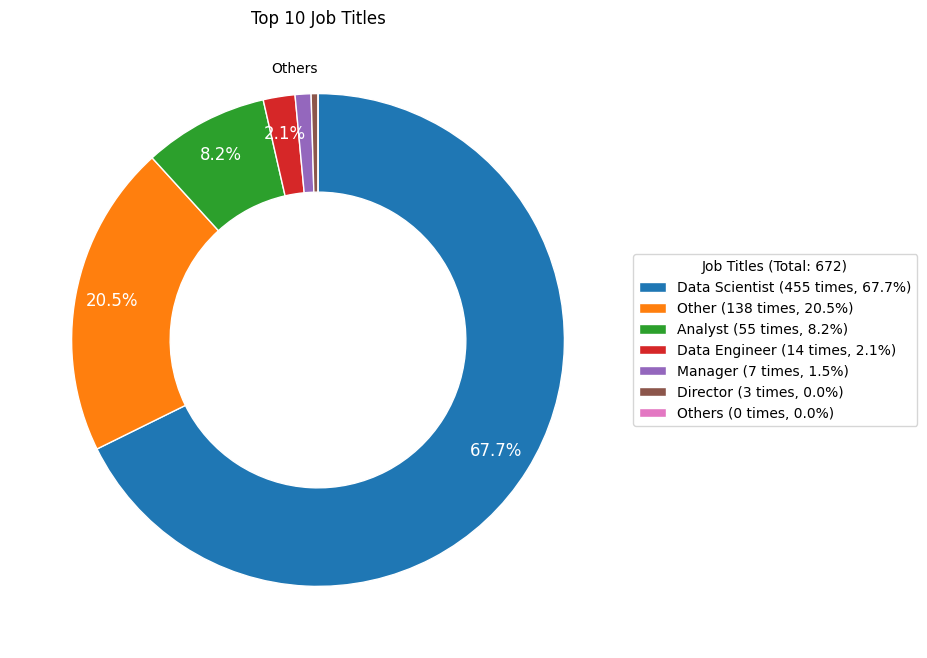

In [250]:
import matplotlib.pyplot as plt

# Get the top 10 job titles by count
top_10_job_titles = df['Job Title Cleaned'].value_counts().head(10)

# Truncate the job title names to the first 25 characters for better readability
labels = [label[:25] for label in top_10_job_titles.index]
counts = top_10_job_titles.values

# Calculate the total count for each title
total_counts = [df['Job Title Cleaned'].tolist().count(title) for title in top_10_job_titles.index]

# Calculate the total number of job titles in the column
total_column_count = df['Job Title Cleaned'].shape[0]

# Calculate the total of the top 10 and the rest
total_top_10 = top_10_job_titles.sum()
total_rest = total_column_count - total_top_10

# Create the donut chart
plt.figure(figsize=(8, 8))

# Get colors from the 'tab10' colormap and add one color for 'Others'
colormap = plt.get_cmap('tab10')
colors = list(colormap.colors) + ['#C0C0C0']  # Gray for 'Others'

# Create the pie chart without exploding the segments
wedges, texts, autotexts = plt.pie(
    top_10_job_titles.tolist() + [total_rest],
    labels=[None] * len(labels) + ['Others'],  # Label for the rest
    autopct=lambda p: '{:.1f}%'.format(p) if p > 2 else '',  # Show percentages greater than 2%
    startangle=90,
    counterclock=False,
    wedgeprops=dict(width=0.4, edgecolor='w'),  # Wider width for the donut
    pctdistance=0.85,  # Distance of the percentage from the center
    colors=colors  # Specify the colors
)

# Get percentages from autotexts
percentages = []
for autotext in autotexts:
    text = autotext.get_text().strip()
    if text:  # Ensure the text is not empty
        percentages.append(float(text.strip('%')))
    else:
        percentages.append(100 - sum(percentages))  # Remaining percentage for the last segment

# Adjust font size and color for percentage texts
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_weight('normal')
    autotext.set_color('white')  # White color for the percentages

# Create a custom legend with total count and percentage
legend_labels = [f"{label} ({count} times, {pct:.1f}%)" for label, count, pct in zip(labels, total_counts, percentages[:-1])]  # Exclude the last percentage for 'Others'
legend_labels.append(f"Others ({total_column_count - sum(counts)} times, {percentages[-1]:.1f}%)")

# Add a legend with the total column count in the title
plt.legend(
    wedges,
    legend_labels,
    title=f"Job Titles (Total: {total_column_count})",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Add a title
plt.title('Top 10 Job Titles')

# Show the chart
plt.show()


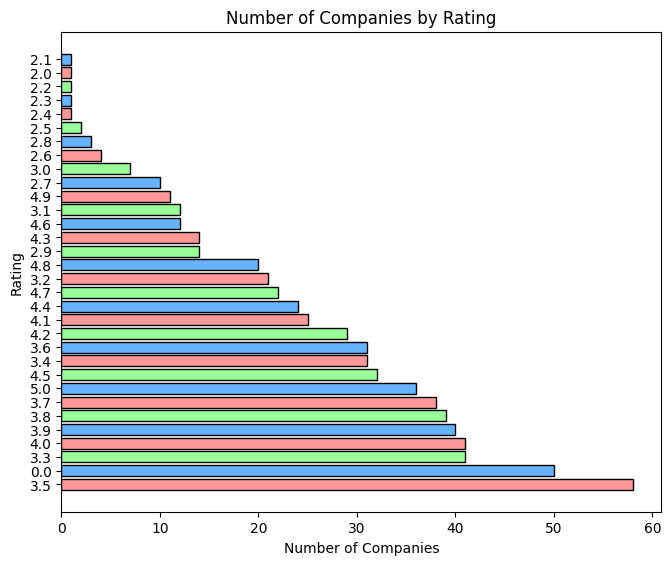

In [251]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_grouped_sorted contains the aggregated and sorted data by 'rating'
# Here, we'll first group and sort the dataset by 'rating' to create df_grouped_sorted
df_grouped = df.groupby('rating').size().reset_index(name='company_count')
df_grouped_sorted = df_grouped.sort_values(by='company_count', ascending=False)

# Custom color list
colors = ['#FF9999', '#66B2FF', '#99FF99']

# Create bar positions with spacing
y_pos = np.arange(len(df_grouped_sorted))

plt.figure(figsize=(10, 6))
bars = plt.barh(y_pos, df_grouped_sorted["company_count"], color=colors[:len(df_grouped_sorted)], edgecolor='black')

# Set labels and title
plt.xlabel('Number of Companies')
plt.ylabel('Rating')
plt.title('Number of Companies by Rating')

# Set y-axis ticks
plt.yticks(y_pos, df_grouped_sorted["rating"])

# Adjust space between the bars and edges
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)

# Show the plot
plt.show()


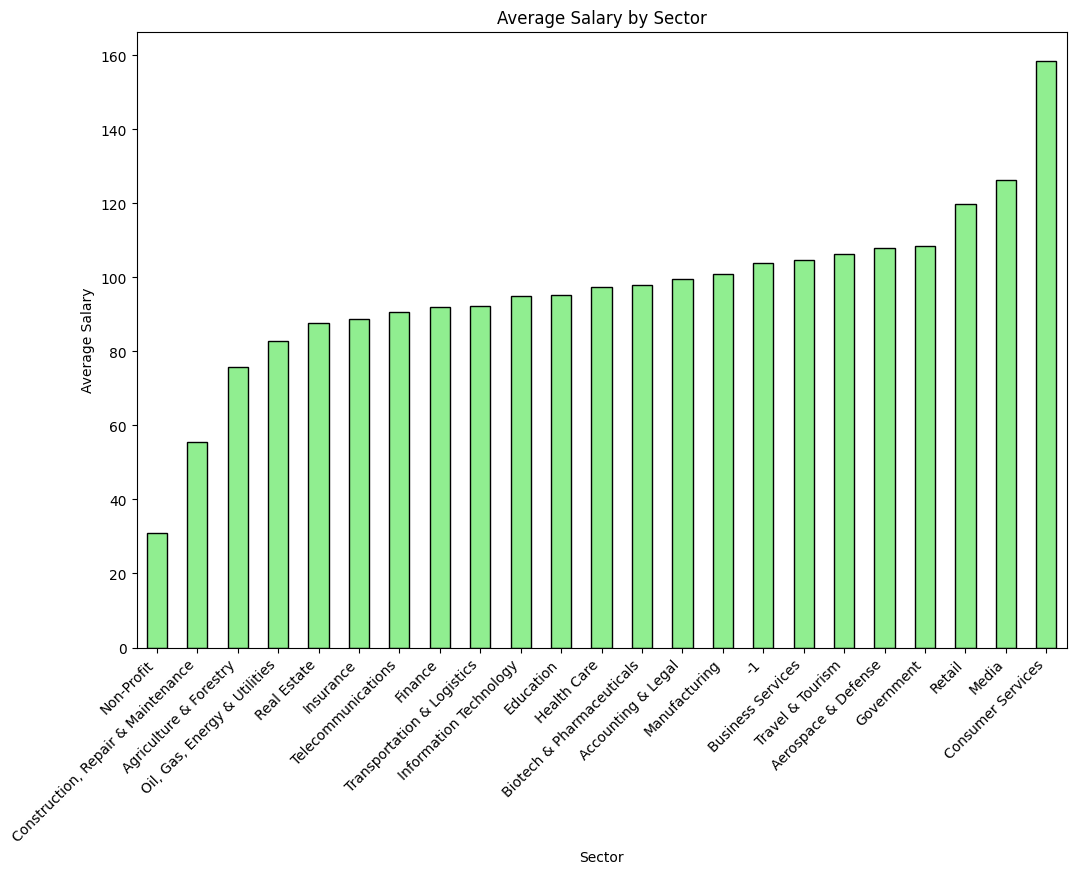

In [252]:
# 1. Group by 'sector' and calculate the average 'salary_average'
sector_salary_avg = df.groupby('sector')['Min Salary'].mean().sort_values()

# Create the bar chart
plt.figure(figsize=(12, 8))
sector_salary_avg.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Sector')
plt.ylabel('Average Salary')
plt.title('Average Salary by Sector')
plt.xticks(rotation=45, ha='right')
plt.show()

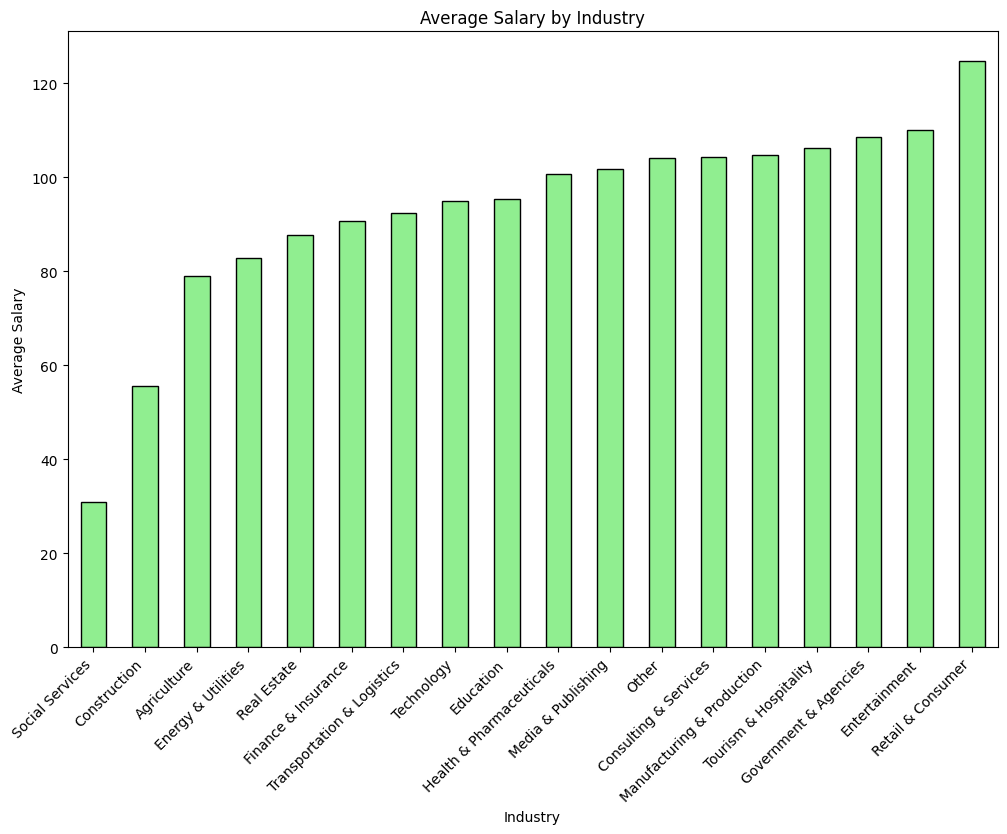

In [253]:
# 2. Group by 'industry' and calculate the average 'salary_average'
industry_salary_avg = df.groupby('industry')['Min Salary'].mean().sort_values()

# Create the bar chart
plt.figure(figsize=(12, 8))
industry_salary_avg.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Industry')
plt.ylabel('Average Salary')
plt.title('Average Salary by Industry')
plt.xticks(rotation=45, ha='right')
plt.show()

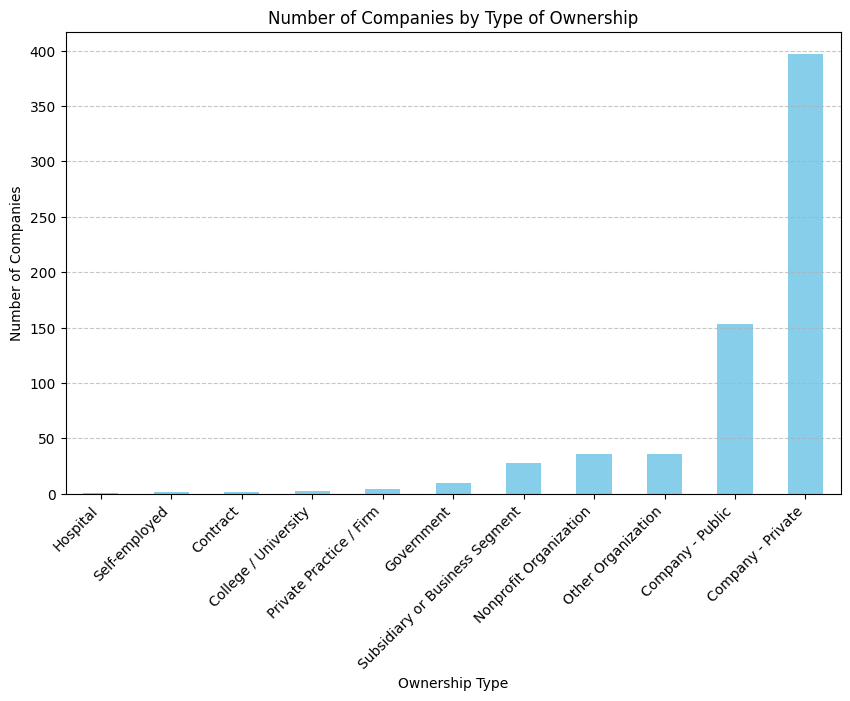

In [254]:
# 3. Count the number of companies by 'size' and sort in ascending order by frequency
size_count = df['type_of_ownership'].value_counts().sort_values()

# Create the bar chart
plt.figure(figsize=(10, 6))
size_count.plot(kind='bar', color='skyblue')
plt.title('Number of Companies by Type of Ownership')
plt.xlabel('Ownership Type')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

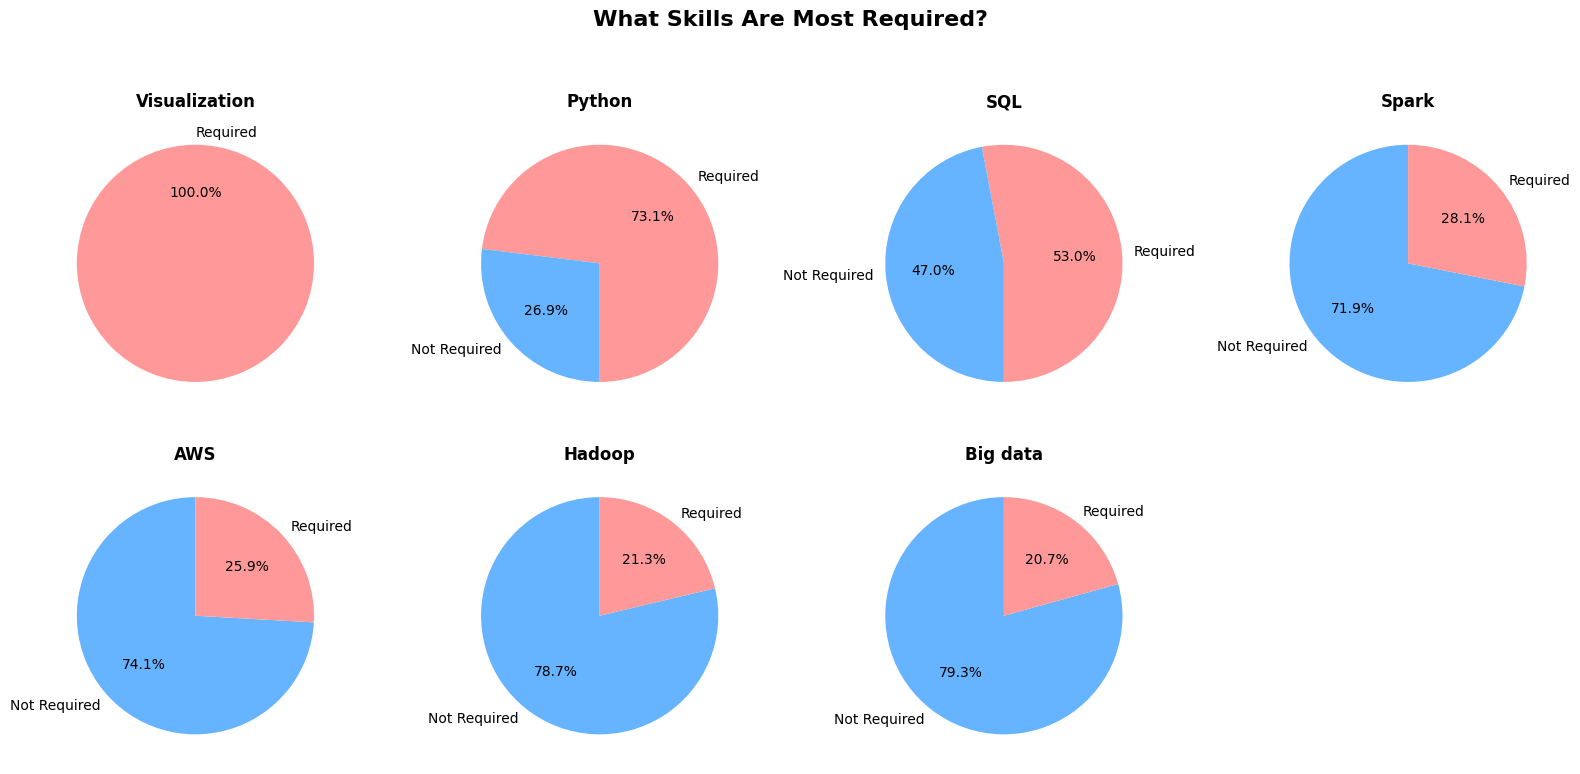

In [255]:

# Colors for 'Required' and 'Not Required'
colors = ['#66b3ff', '#ff9999']  # 'Required' in blue and 'Not Required' in red

# List of skill columns to plot
skills_columns = ['Python', 'Hadoop', 'Spark', 'AWS', 'Visualization', 'Big_Data', 'SQL']

# Check and filter columns that actually exist in the dataset
skills_columns_filtered = [col for col in skills_columns if col in df.columns]

# Calculate the percentage of "Required" for each column
required_percentages = {col: df[col].mean() for col in skills_columns_filtered}

# Sort columns by the percentage of "Required" in descending order
skills_columns_sorted = sorted(required_percentages, key=required_percentages.get, reverse=True)

# Convert skill column names to uppercase/lowercase for titles and replace underscores
skill_titles = [col.upper() if col in ['SQL', 'AWS'] else col.replace('_', ' ').capitalize() for col in skills_columns_sorted]

# Define rows and columns for the grid
rows = 2
columns_per_row = 4

# Create the figure and axes for the charts
fig, axes = plt.subplots(rows, columns_per_row, figsize=(16, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Add main title
fig.suptitle('What Skills Are Most Required?', fontsize=16, weight='bold')

# Create pie charts for each skill
for i, column in enumerate(skills_columns_sorted):
    # Only create pie charts for columns that exist in the dataset
    if column in df.columns:
        labels = {0: 'Not Required', 1: 'Required'}
        count = df[column].value_counts()
        # Adjust start angle so "Not Required" is at the top
        startangle = 90 if 0 in count.index and count[0] > count.get(1, 0) else 270
        axes[i].pie(
            count,
            labels=[labels[int(k)] for k in count.index],
            autopct='%1.1f%%',
            startangle=startangle,
            colors=[colors[int(k)] for k in count.index]
        )
        axes[i].set_title(f'{skill_titles[i]}', fontsize=12, weight='bold')

# Hide any unused subplots
for i in range(len(skills_columns_sorted), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to leave space for the main title

# Show the complete figure
plt.show()


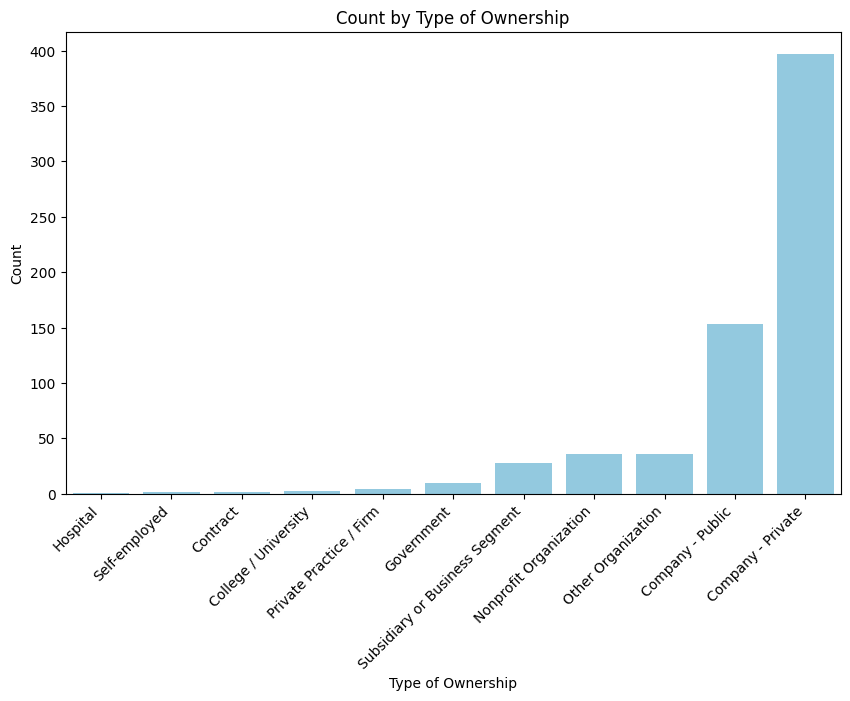

In [256]:

# Ensure the 'type_of_ownership' column values are all strings
df['type_of_ownership'] = df['type_of_ownership'].astype(str)

# Count values in 'type_of_ownership'
ownership_counts = df['type_of_ownership'].value_counts()

# Sort values in ascending order
ownership_counts_sorted = ownership_counts.sort_values(ascending=True)

# Create the bar chart using a specific color
plt.figure(figsize=(10, 6))
sns.barplot(x=ownership_counts_sorted.index, y=ownership_counts_sorted.values, color='skyblue')  # Assign a specific color
plt.title('Count by Type of Ownership')
plt.xlabel('Type of Ownership')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


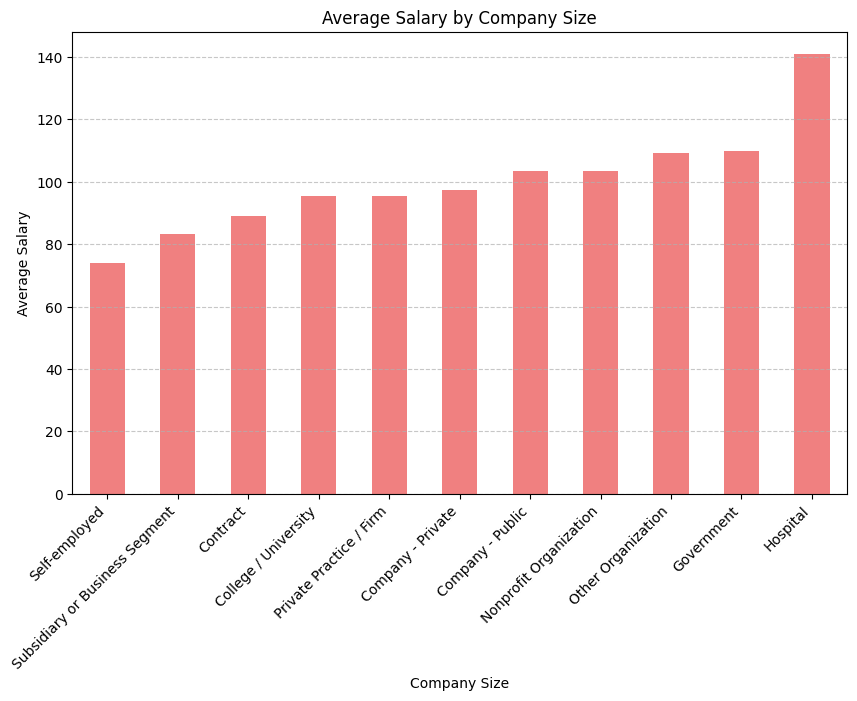

In [257]:
# 6. Calculate average salary by company size
average_salary_by_size = df.groupby('type_of_ownership')['Min Salary'].mean().sort_values()

# Create the bar chart
plt.figure(figsize=(10, 6))
average_salary_by_size.plot(kind='bar', color='lightcoral')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

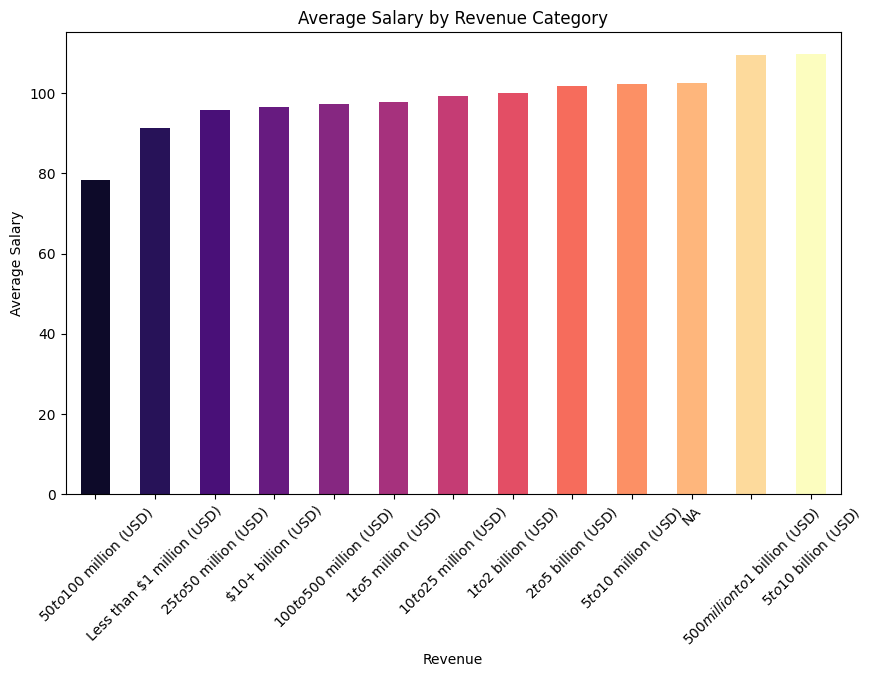

In [258]:
# 7. Group by 'revenue' and calculate the average salary, then sort in ascending order
average_salary_by_revenue = df.groupby('revenue')['Min Salary'].mean().sort_values()

# Create the bar chart with 'magma' color palette
plt.figure(figsize=(10, 6))
average_salary_by_revenue.plot(kind='bar', color=plt.cm.magma(average_salary_by_revenue.rank().astype(int) / average_salary_by_revenue.size))
plt.title('Average Salary by Revenue Category')
plt.xlabel('Revenue')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

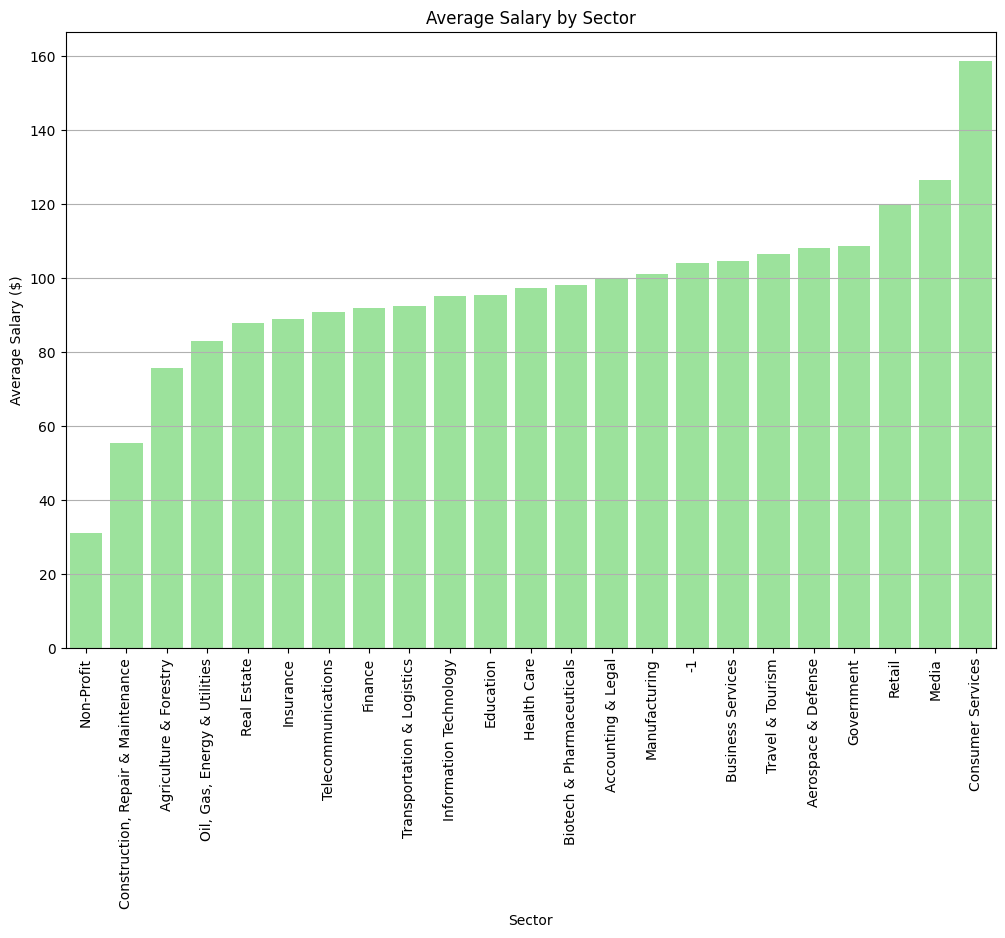

In [259]:

# Average salary by sector using Seaborn
salary_by_sector = df.groupby('sector')['Min Salary'].mean().sort_values()

# Create bar plot with a specific color
plt.figure(figsize=(12, 8))
sns.barplot(x=salary_by_sector.index, y=salary_by_sector.values, color='lightgreen')  # Using a single color
plt.xticks(rotation=90)
plt.title('Average Salary by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Salary ($)')
plt.grid(axis='y')
plt.show()


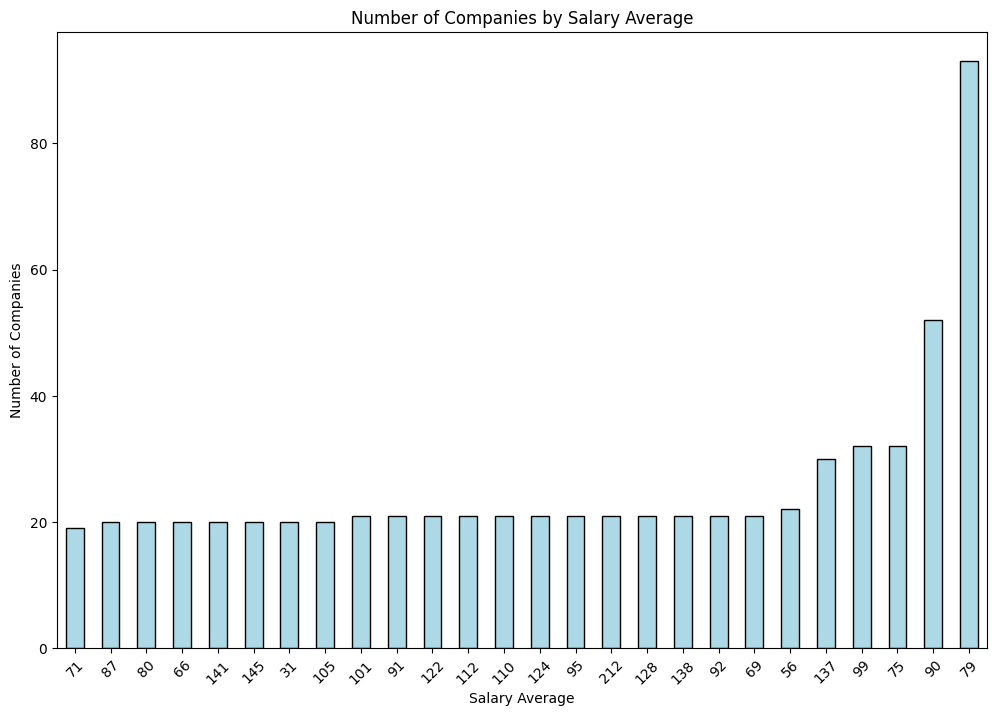

In [260]:
# Count the frequency of each value in the 'Min Salary' column
salary_counts = df['Min Salary'].value_counts()

# Sort counts in ascending order
sorted_salary_counts = salary_counts.sort_values()

# Create the bar chart
plt.figure(figsize=(12, 8))
sorted_salary_counts.plot(kind='bar', color='lightblue', edgecolor='black')

# Add labels and title
plt.xlabel('Salary Average')
plt.ylabel('Number of Companies')
plt.title('Number of Companies by Salary Average')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


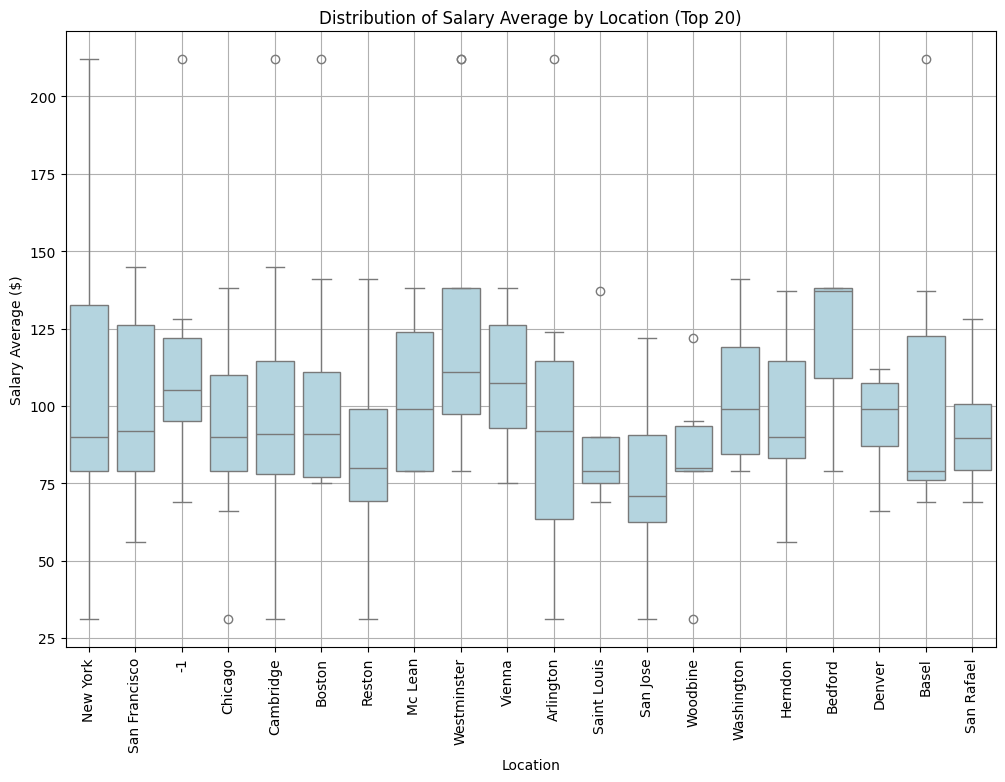

In [261]:
# Count the occurrences of each location
location_counts = df['headquarters'].value_counts()

# Select the top 20 most frequent locations
top_20_locations = location_counts.head(20).index

# Filter the DataFrame to include only the top 20 locations
df_top_20 = df[df['headquarters'].isin(top_20_locations)]

# Order the locations by frequency
location_order = location_counts.head(20).index

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='headquarters', y='Min Salary', data=df_top_20, order=location_order, color='lightblue')  # Using color instead of palette
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Salary Average by Location (Top 20)')
plt.xlabel('Location')
plt.ylabel('Salary Average ($)')
plt.grid(True)
plt.show()

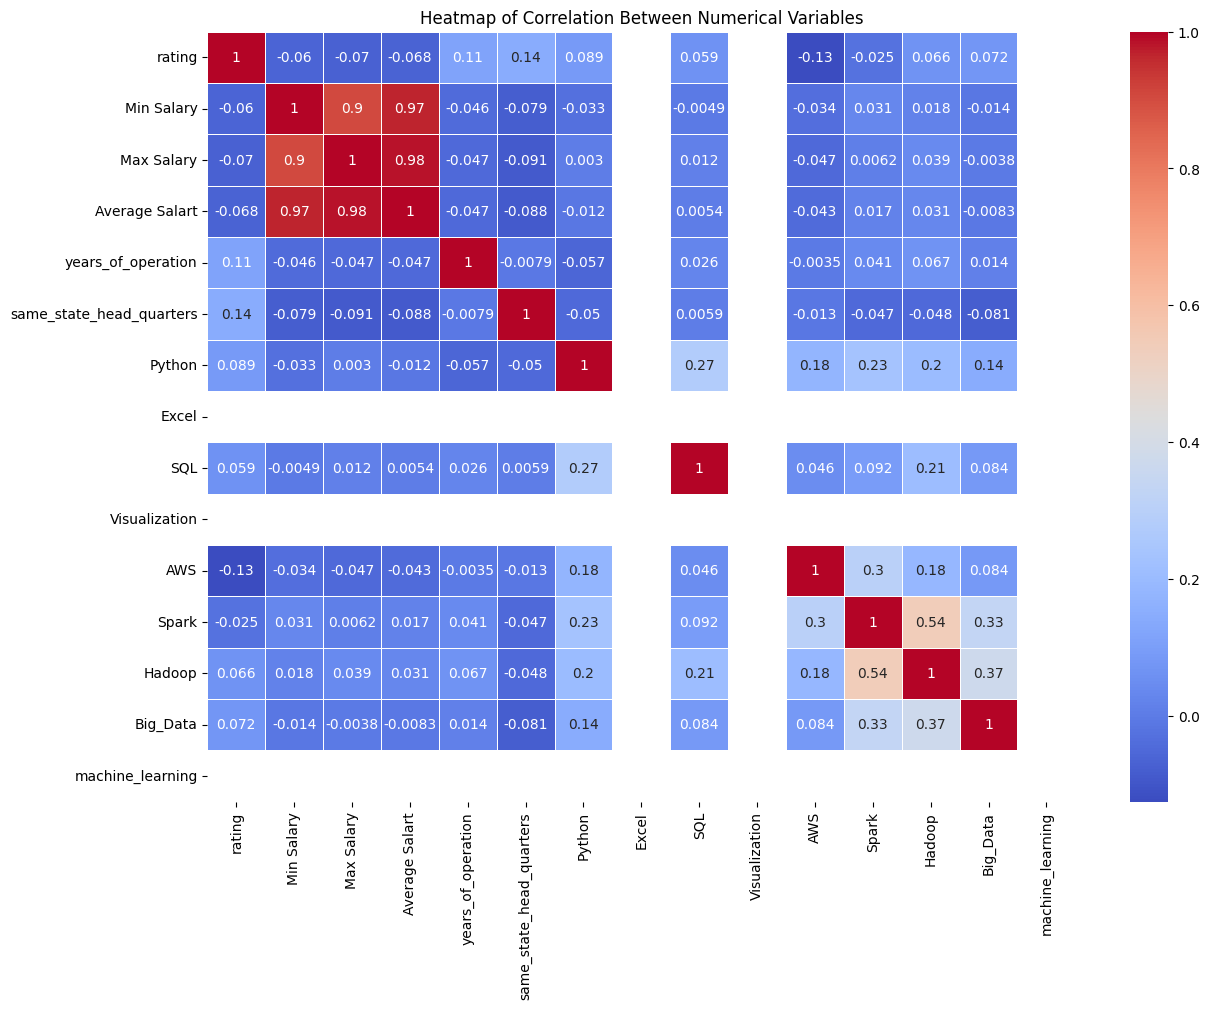

In [262]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Set up the figure size
plt.figure(figsize=(14, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title and show the plot
plt.title('Heatmap of Correlation Between Numerical Variables')
plt.show()

In [263]:
df

,rating,company_name,headquarters,type_of_ownership,industry,sector,revenue,Job Title Cleaned,Job Level,Min Salary,...,Python,Excel,SQL,Visualization,AWS,Spark,Hadoop,Big_Data,machine_learning,segment
0,3.1,Healthfirst,New York,Nonprofit Organization,Finance & Insurance,Insurance,NA,Data Scientist,Senior,137,...,0,0,0,1,1,0,0,0,0,Corporate
1,4.2,ManTech,Herndon,Company - Public,Health & Pharmaceuticals,Business Services,$1 to $2 billion (USD),Data Scientist,Other,137,...,0,0,1,1,0,0,1,1,0,Corporate
2,3.8,Analysis Group,Boston,Private Practice / Firm,Consulting & Services,Business Services,$100 to $500 million (USD),Data Scientist,Other,137,...,1,0,0,1,1,0,0,0,0,Corporate
3,3.5,INFICON,Bad Ragaz,Company - Public,Manufacturing & Production,Manufacturing,$100 to $500 million (USD),Data Scientist,Other,137,...,1,0,1,1,1,0,0,0,0,Middle
4,2.9,Affinity Solutions,New York,Company - Private,Media & Publishing,Business Services,NA,Data Scientist,Other,137,...,1,0,1,1,0,0,0,0,0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,3.6,TRANZACT,Fort Lee,Company - Private,Media & Publishing,Business Services,NA,Data Scientist,Other,105,...,1,0,1,1,0,0,1,1,0,Corporate
668,0.0,JKGT,-1,Other Organization,Other,-1,NA,Data Scientist,Other,105,...,0,0,0,1,0,0,0,0,0,NA
669,0.0,AccessHope,-1,Other Organization,Other,-1,NA,Data Scientist,Other,105,...,1,0,1,1,0,0,1,0,0,NA
670,5.0,ChaTeck Incorporated,Santa Clara,Company - Private,Media & Publishing,Business Services,$1 to $5 million (USD),Data Scientist,Other,105,...,1,0,1,1,0,1,1,1,0,Small


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


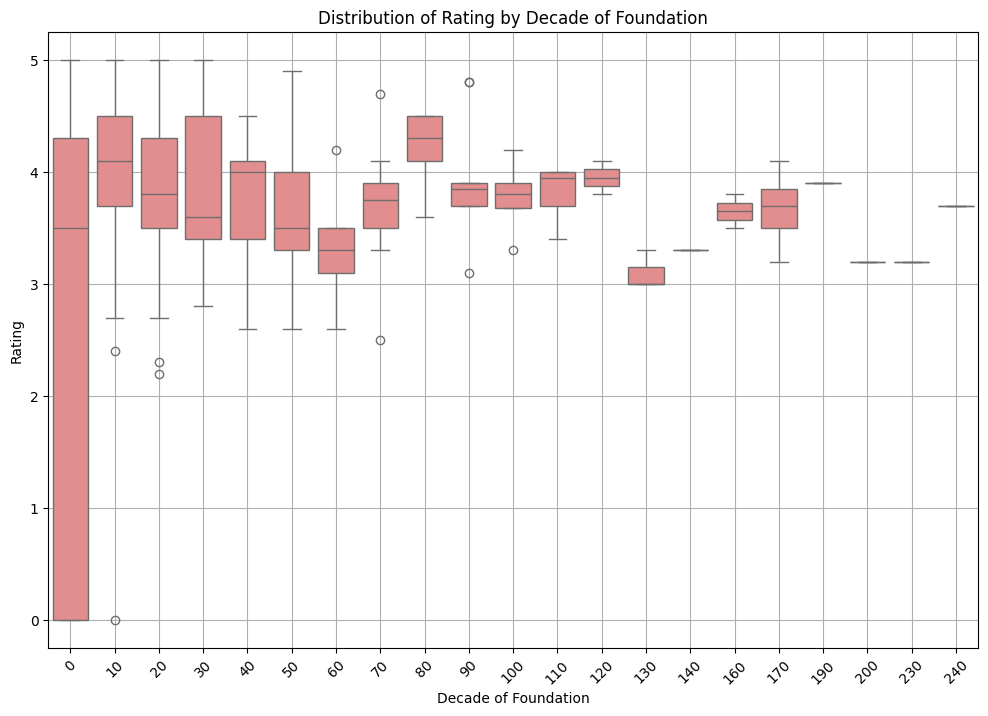

In [264]:
# Create a new column that groups by decade of foundation
df['founded_decade'] = (df['years_of_operation'] // 10) * 10

# Create the box plot without using a palette
plt.figure(figsize=(12, 8))
sns.boxplot(x='founded_decade', y='rating', data=df, color='lightcoral')  # Using a specific color instead of a palette

# Customize the plot
plt.title('Distribution of Rating by Decade of Foundation')
plt.xlabel('Decade of Foundation')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.grid(True)
plt.show()

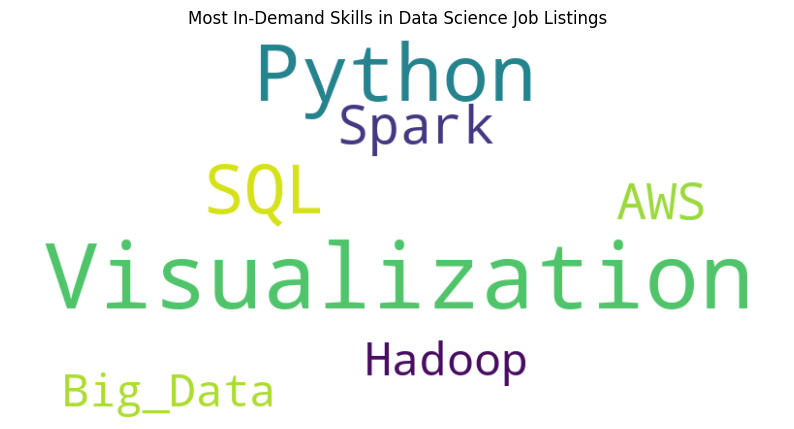

In [265]:
from wordcloud import WordCloud

# Define the list of skill columns
skills_columns = ['Python', 'Excel', 'SQL', 'Visualization', 'AWS', 'Spark', 'Hadoop', 'Big_Data', 'machine_learning']

# Sum the values for each skill to get the frequency of requirement
skills_counts = df[skills_columns].sum()

# Convert the counts into a dictionary for word cloud input
skills_dict = skills_counts.to_dict()

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(skills_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most In-Demand Skills in Data Science Job Listings')
plt.show()


## Advanced EDA

Skills by Industry

**Objective:**
Understand how different skills are valued across various industries.

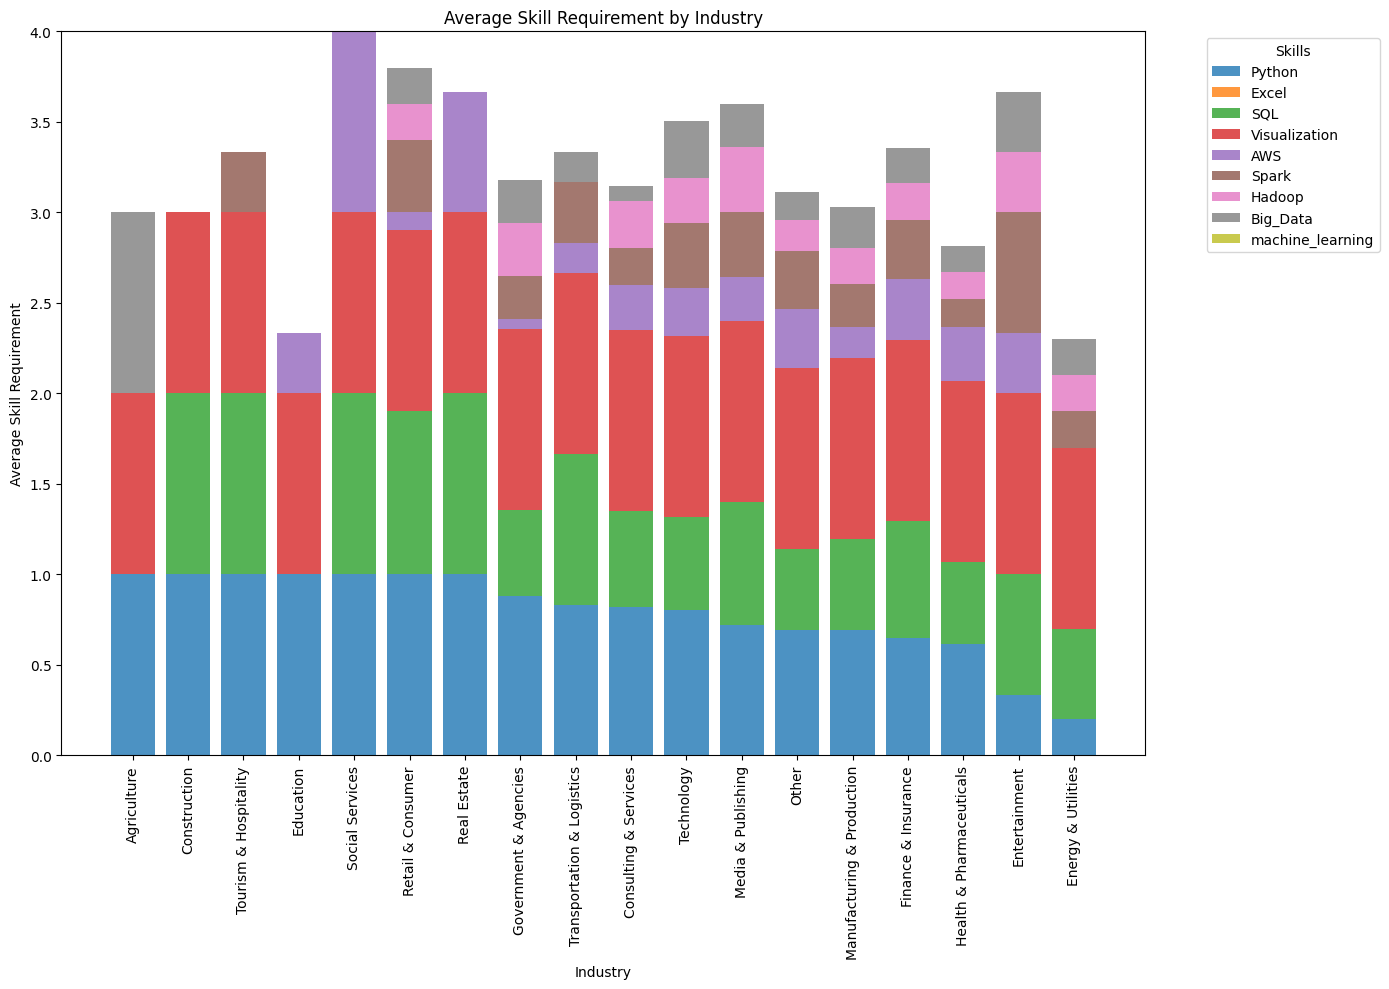

In [266]:
# List of skills columns
skills_columns = ['Python', 'Excel', 'SQL', 'Visualization', 'AWS', 'Spark', 'Hadoop', 'Big_Data', 'machine_learning']

# Group by 'industry' and calculate the average requirement for each skill
industry_skills_avg = df.groupby('industry')[skills_columns].mean()

# Sort by an industry attribute for better visual ordering (e.g., by average Python skill)
industry_skills_avg = industry_skills_avg.sort_values(by='Python', ascending=False)

# Plotting the stacked bar chart
plt.figure(figsize=(14, 10))

# Iterate through each skill and add a stacked bar for it
bottom_val = None  # To keep track of where to stack the next skill
for skill in skills_columns:
    plt.bar(
        industry_skills_avg.index,
        industry_skills_avg[skill],
        label=skill,
        bottom=bottom_val,
        alpha=0.8
    )
    # Update bottom to include the previous values
    if bottom_val is None:
        bottom_val = industry_skills_avg[skill]
    else:
        bottom_val += industry_skills_avg[skill]

# Adding labels and title
plt.xlabel('Industry')
plt.ylabel('Average Skill Requirement')
plt.title('Average Skill Requirement by Industry')
plt.xticks(rotation=90)
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()